## 1. Fourier transform for spectral analyses  

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
sample_rate = 1200 # Hz
duration = 2 # seconds
npnts = sample_rate*duration
freqs_arrays = np.array([12 , 18 , 30])

In [3]:
time_points = np.arange(0 , npnts)/sample_rate
signal = np.zeros(npnts)

for fi in range(len(freqs_arrays)):
    signal = signal + (fi+1)*np.sin(2*np.pi*freqs_arrays[fi]*time_points)

signal_Noise = signal + 7*np.random.randn(npnts)

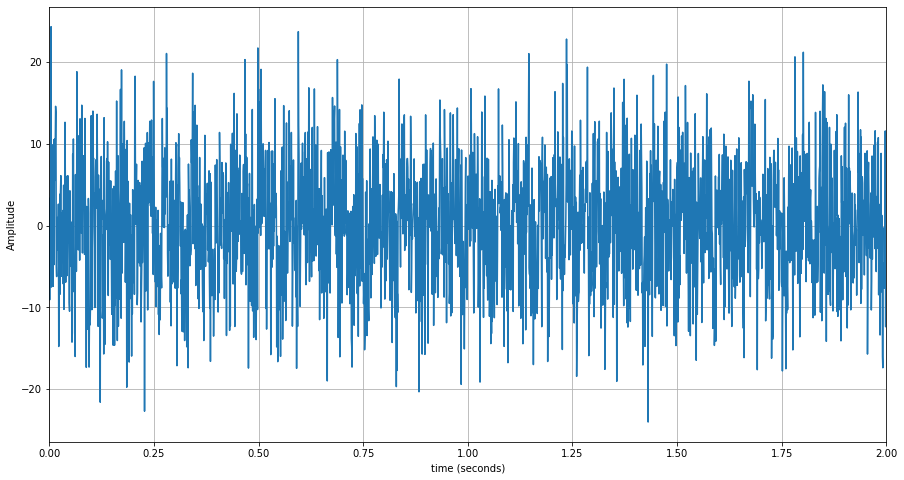

In [4]:
plt.figure(figsize = (15,8))
plt.plot(time_points , signal_Noise)
plt.xlabel('time (seconds)')
plt.ylabel('Amplitude')
plt.xlim([0,2])
plt.grid();

In [5]:
signalX = np.fft.fft(signal_Noise)
signalAmp = 2*np.abs(signalX)/npnts
hz = np.linspace(0 , sample_rate/2 , int(np.floor(npnts/2) +1))

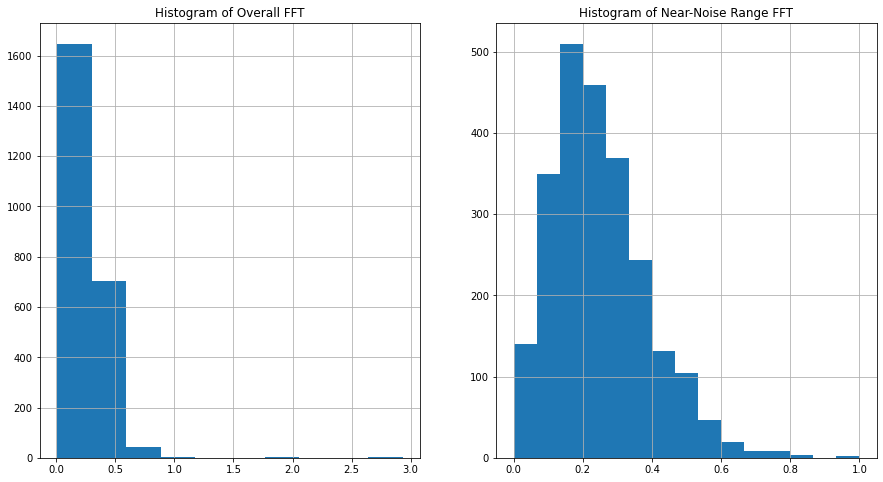

In [6]:
fig , ax = plt.subplots(nrows=1 , ncols = 2 , figsize = (15,8))
ax[0].hist(signalAmp)
ax[0].set_title('Histogram of Overall FFT')
ax[0].grid()

thr_list = ax[1].hist(signalAmp , range = [0,1] , bins = 15)
ax[1].set_title('Histogram of Near-Noise Range FFT')
ax[1].grid();

In [7]:
threshold = thr_list[1][thr_list[0][thr_list[0]>0].argmin()+1]
print('Threshold is selected as {}'.format(threshold))

Threshold is selected as 0.9333333333333333


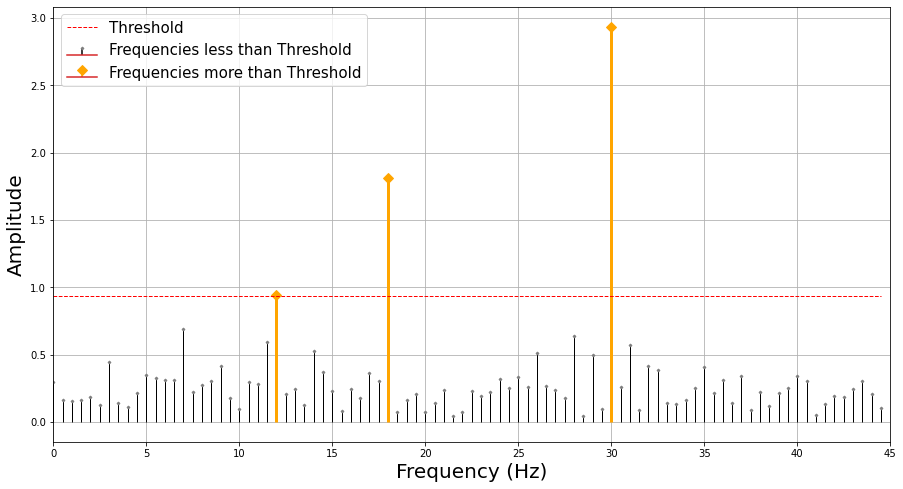

In [8]:
IsNotHereBefore_less = True
IsNotHereBefore_more = True
plt.figure(figsize = (15,8))
for i in range(3*freqs_arrays.max()):
    if signalAmp[i] < threshold:
        if IsNotHereBefore_less:
            (markers, stemlines, baseline) = plt.stem([hz[i]],[signalAmp[i]],
                                                      use_line_collection=True, label = 'Frequencies less than Threshold')
            IsNotHereBefore_less = False
        else:
            (markers, stemlines, baseline) = plt.stem([hz[i]],[signalAmp[i]] , use_line_collection=True)
        plt.setp(markers, marker='D', markersize = 2 , color = 'grey')
        plt.setp(stemlines, linestyle="-", color="black", linewidth=1)
    else:
        if IsNotHereBefore_more:
            (markers, stemlines, baseline) = plt.stem([hz[i]],[signalAmp[i]],
                                                      use_line_collection=True, label = 'Frequencies more than Threshold')
            IsNotHereBefore_more = False
        else:
            (markers, stemlines, baseline) = plt.stem([hz[i]],[signalAmp[i]] , use_line_collection=True)
        plt.setp(markers, marker='D', markersize = 7 , color = 'orange')
        plt.setp(stemlines, linestyle="-", color="orange", linewidth=3)
plt.plot(hz[np.arange(3*freqs_arrays.max())] , threshold*np.ones(3*freqs_arrays.max()),
         linestyle = 'dashed' , linewidth = 1 , color = 'red' , label = 'Threshold')  ;
plt.legend(fontsize = 15)
plt.grid()
plt.xlabel('Frequency (Hz)' , fontsize = 20)
plt.ylabel('Amplitude' , fontsize = 20)
plt.xlim([0 ,hz[3*freqs_arrays.max()] ]) ; 
    

In [9]:
Filtered_signal = np.zeros(npnts)
for i in range(npnts):
    if signalAmp[i] > threshold:
        Filtered_signal[i] = signalAmp[i]
        
Filtered_signal = np.real(np.fft.ifft(Filtered_signal))*npnts/2

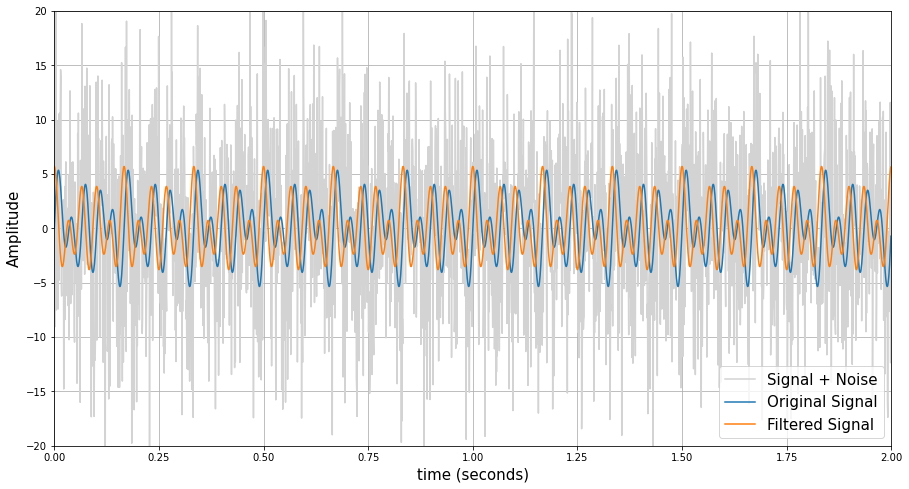

In [10]:
plt.figure(figsize = (15,8))
plt.plot(time_points , signal_Noise , color = 'lightgrey' , label = 'Signal + Noise')
plt.plot(time_points , signal, label = 'Original Signal')
plt.plot(time_points , Filtered_signal, label = 'Filtered Signal')
plt.xlabel('time (seconds)' , fontsize = 15)
plt.ylabel('Amplitude' , fontsize = 15)
plt.xlim([0,2])
plt.ylim([-20 , 20])
plt.legend(fontsize = 15)
plt.grid();

In [11]:
OnlineCourse = pd.read_csv('online course web search.csv')
length = OnlineCourse['Category: All categories'].size
Numbers = np.zeros(length-1)
Weeks = []
for i in range(length-1):
    Numbers[i] = OnlineCourse['Category: All categories'][i+1]
    Weeks.append(OnlineCourse['Category: All categories'].keys()[i+1])

E:\Python\conda_project\first_project\env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


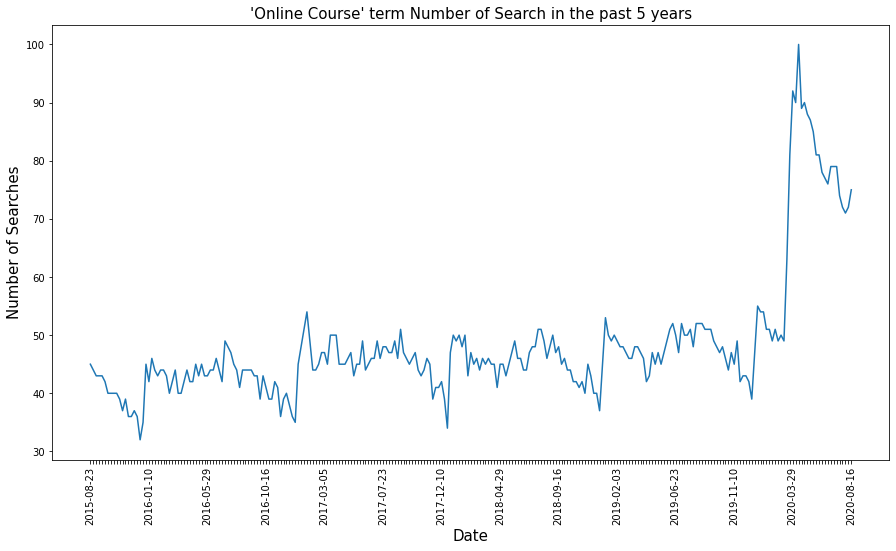

In [12]:
fig , ax = plt.subplots(figsize = (15,8))
ax.plot(Weeks , Numbers);
#ax.xaxis.xticks(rotation='vertical')
ax.set_xticklabels(Weeks , rotation= 'vertical')
Reduced = 20
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % Reduced != 0:
        label.set_visible(False)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Number of Searches', fontsize = 15)
ax.set_title('\'Online Course\' term Number of Search in the past 5 years' , fontsize = 15);

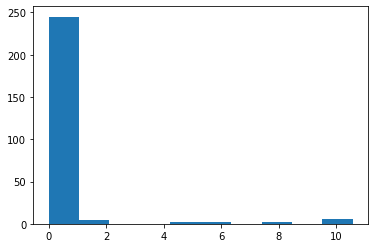

In [13]:
hr = np.linspace(0,52*5,length-1)
Numbers = Numbers - np.mean(Numbers)
Freq_search = np.abs(np.fft.fft(Numbers/length)**2)
plt.hist(Freq_search);

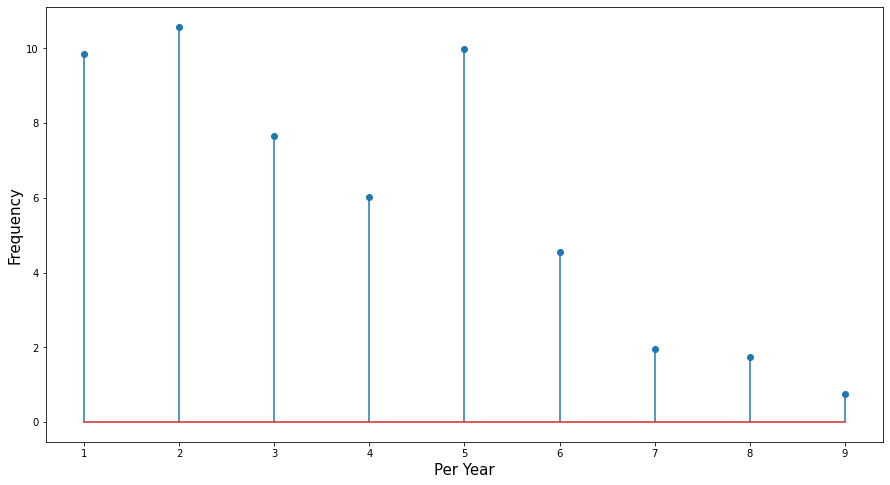

In [14]:
threshold = 0
Filtered_search = np.zeros(length-1)
for i in range(length-1):
    if Freq_search[i] > threshold:
        Filtered_search[i] = Freq_search[i] 
plt.figure(figsize = (15,8))
plt.stem(hr[1:10] , Filtered_search[1:10] , use_line_collection = True)
plt.xlabel('Per Year' , fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);

## 2. Welch's method and windowing

In [15]:
from scipy.io import loadmat
x = loadmat('EEGrestingState.mat')
EEGData = x['eegdata']
EEGData = np.reshape(EEGData , (-1,))
N = len(EEGData)
sample_rate = x['srate'][0]
timevec = np.arange(N)/sample_rate

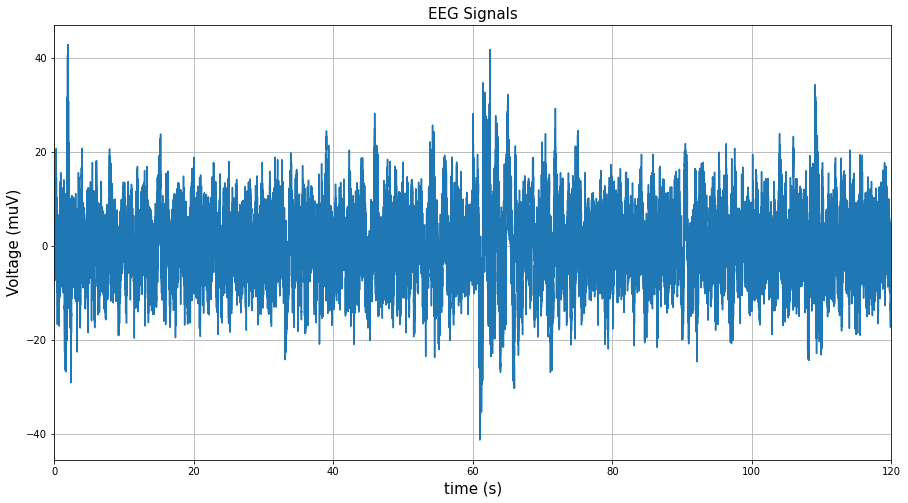

In [16]:
plt.figure(figsize = (15,8))
plt.plot(timevec , EEGData)
plt.xlabel('time (s)' , fontsize = 15)
plt.ylabel('Voltage (muV)', fontsize = 15)
plt.title('EEG Signals', fontsize = 15)
plt.xlim([0,120])
plt.grid()

In [17]:
eegpow = np.abs(np.fft.fft(EEGData)/N)**2
hz = np.linspace(0 , sample_rate/2 , int(np.floor(N/2)+1))

### Creating Welch Method

In [18]:
### window duration = 10 sec ###
time = 10 #sec
winwelch_len = time*sample_rate
Overlap_points_number = np.round(sample_rate/2) # 50%
Win_Onset_time = np.arange(0,N - winwelch_len , Overlap_points_number)

hzwin_10 = np.linspace(0 , sample_rate/2 , int(np.floor(winwelch_len/2)+1))
hann_window = 0.5 - np.cos(2*np.pi*np.linspace(0 , 1 , int(winwelch_len)))/2

eegpow_welch = np.zeros(len(hzwin_10))


for i in range(len(Win_Onset_time)):
    eegpow_temp = np.abs(np.fft.fft(EEGData[int(Win_Onset_time[i]):int(Win_Onset_time[i]+winwelch_len)]*hann_window/winwelch_len))**2
    eegpow_welch += eegpow_temp[:len(hzwin_10)]

eegpow_welch_10 = eegpow_welch / len(Win_Onset_time)

In [19]:
### window duration = 50 sec ###
time = 50 #sec
winwelch_len = time*sample_rate
Overlap_points_number = np.round(sample_rate/2) # 50%
Win_Onset_time = np.arange(0,N - winwelch_len , Overlap_points_number)

hzwin_50 = np.linspace(0 , sample_rate/2 , int(np.floor(winwelch_len/2)+1))
hann_window = 0.5 - np.cos(2*np.pi*np.linspace(0 , 1 , int(winwelch_len)))/2

eegpow_welch = np.zeros(len(hzwin_50))


for i in range(len(Win_Onset_time)):
    eegpow_temp = np.abs(np.fft.fft(EEGData[int(Win_Onset_time[i]):int(Win_Onset_time[i]+winwelch_len)]*hann_window/winwelch_len))**2
    eegpow_welch += eegpow_temp[:len(hzwin_50)]

eegpow_welch_50 = eegpow_welch / len(Win_Onset_time)

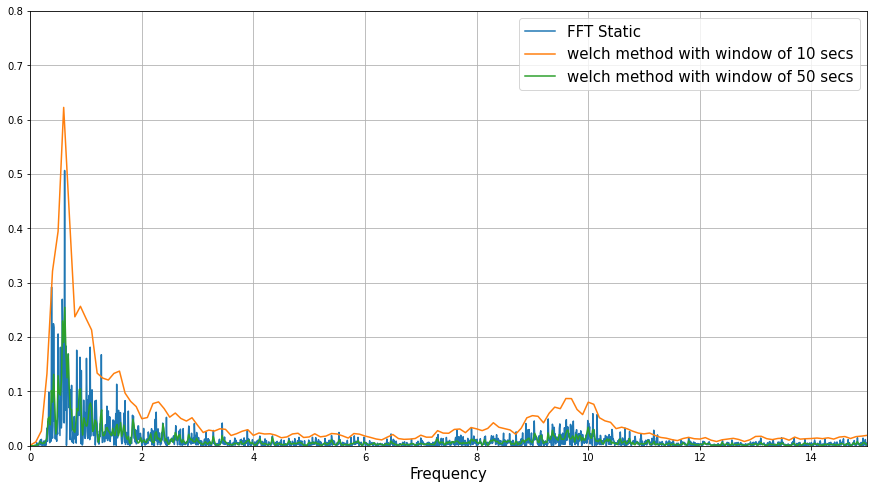

In [20]:
plt.figure(figsize = (15,8))
plt.plot(hz , eegpow[:len(hz)] , label = 'FFT Static')
plt.plot(hzwin_10 , eegpow_welch_10 , label = 'welch method with window of 10 secs')
plt.plot(hzwin_50 , eegpow_welch_50 , label = 'welch method with window of 50 secs')
plt.xlabel('Frequency',fontsize = 15)
plt.xlim([0,15])
plt.ylim([0,0.8])
plt.legend(fontsize = 15)
plt.grid();

## 3. Spectrogram of birdsong

In [21]:
from scipy.io import wavfile
from scipy import signal as sig
fs, data = wavfile.read('XC403881.wav')
BirdSong = sig.detrend(data[:,0])
N = len(BirdSong)
sample_rate = fs
timevec = np.arange(0,N)/sample_rate

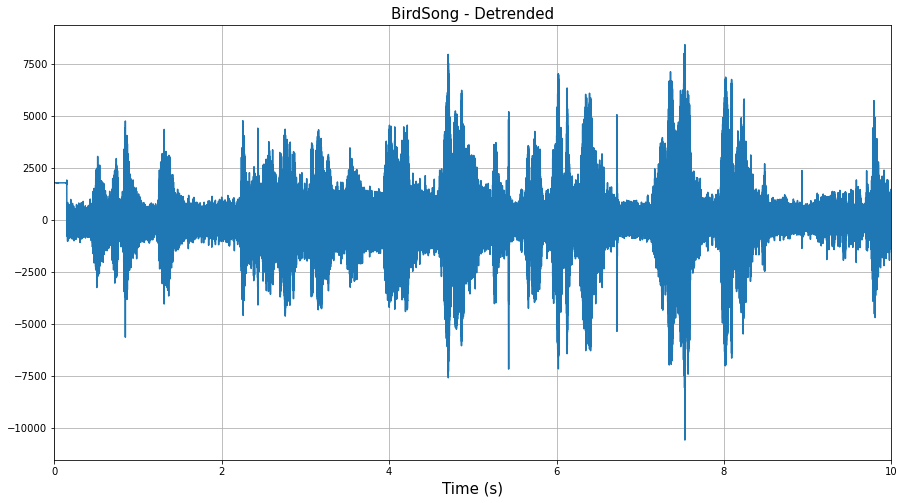

In [22]:
plt.figure(figsize = (15,8))
plt.plot(timevec , BirdSong)
plt.title('BirdSong - Detrended' , fontsize = 15)
plt.xlabel('Time (s)' , fontsize = 15)
plt.xlim([0,10])
plt.grid()

In [23]:
hz = np.linspace(0 , sample_rate/2 , int(np.floor(N/2)+1))
bspower = np.abs(np.fft.fft(BirdSong/N))**2

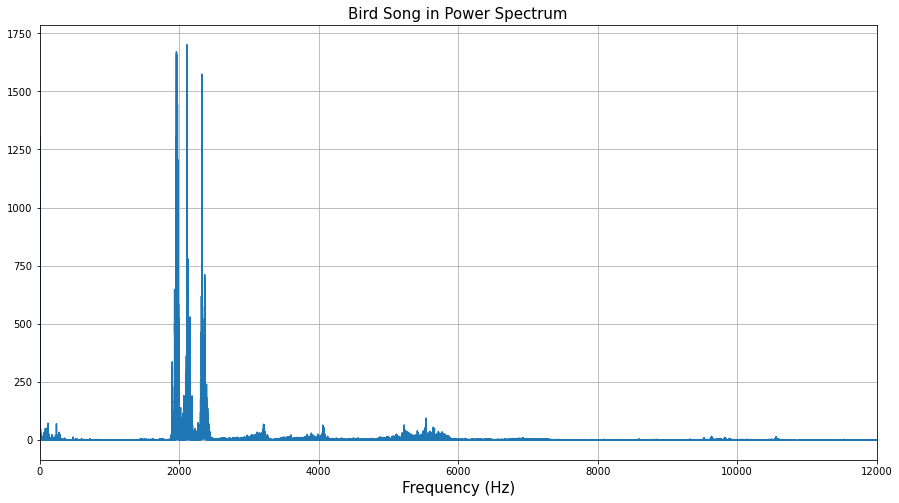

In [24]:
plt.figure(figsize = (15,8))
plt.plot(hz , bspower[:len(hz)])
plt.xlabel('Frequency (Hz)',fontsize = 15)
plt.title('Bird Song in Power Spectrum' , fontsize = 15)
plt.xlim([0 , 12000])
plt.grid();

In [25]:
f, t, Sxx = sig.spectrogram(BirdSong , fs=sample_rate, window = ('hann'))

E:\Python\conda_project\first_project\env\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


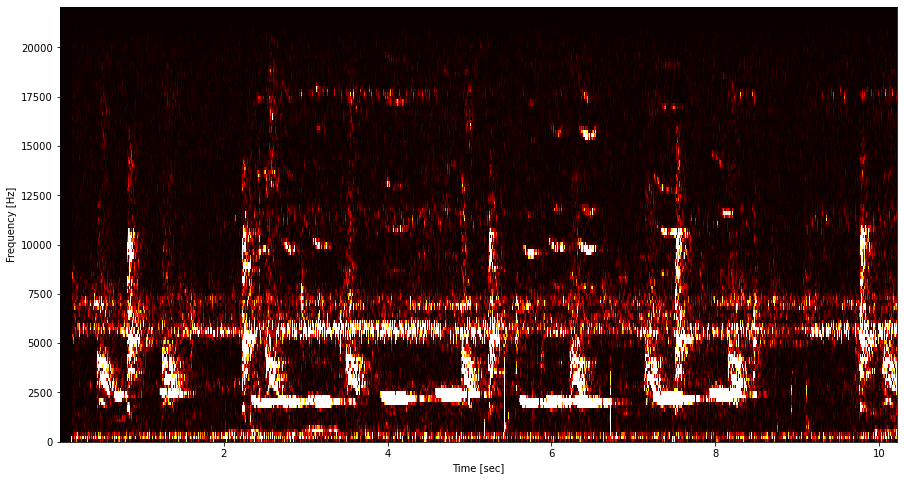

In [26]:
from matplotlib import colors
plt.figure(figsize=[15,8])
plt.pcolormesh(t, f, Sxx,cmap ='hot' , norm=colors.Normalize( vmax=75))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]');

## 4. Code challenge Compute a spectrogram!

In [27]:
x = loadmat('spectral_codeChallenge.mat')
Signal = np.reshape(x['signal'],(-1,))
N = len(Signal)
timevec = np.reshape(x['time'] , (-1,))
sample_rate = x['srate'][0]

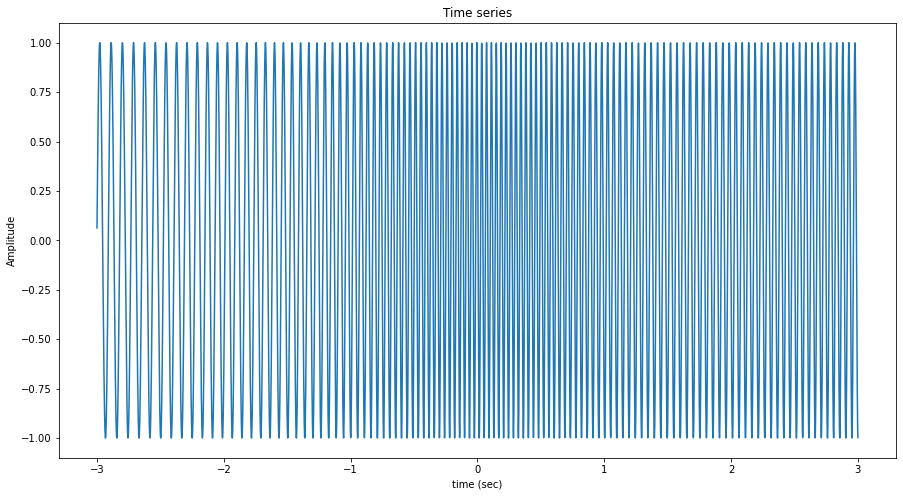

In [28]:
plt.figure(figsize = (15,8))
plt.plot(timevec,Signal)
plt.xlabel('time (sec)')
plt.ylabel('Amplitude')
plt.title('Time series');

In [29]:
SignalOverallpow = np.abs(np.fft.fft(Signal/N))**2
hz = np.linspace(0 , sample_rate/2 , int(np.floor(N/2)+1))

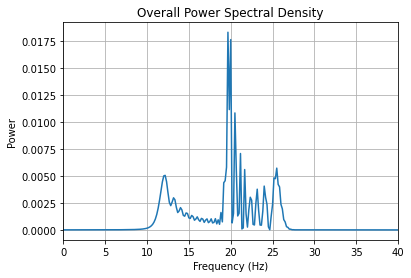

In [30]:
plt.plot(hz , SignalOverallpow[:len(hz)])
plt.grid()
plt.xlim([0,40])
plt.title('Overall Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power');

In [31]:
window_length = 0.5 #sec
N_win = int(window_length*sample_rate)
onset_times = np.arange(timevec.min() , timevec.max()+window_length , window_length)
Windows = np.arange(0 , len(Signal) , N_win)

hz_win = np.linspace(0 , sample_rate/2 , int(np.floor(N_win/2)+1))

In [32]:
SpecMat = np.zeros((len(hz_win) , len(Windows)))
for i in range(len(Windows)):
    TempSpec = np.abs(np.fft.fft(Signal[int(Windows[i]):int(Windows[i]+N_win)])/N_win)**2
    SpecMat[:,i] = TempSpec[:len(hz_win)]

E:\Python\conda_project\first_project\env\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


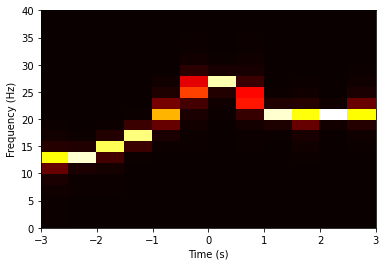

In [33]:
plt.pcolormesh(onset_times,hz_win ,SpecMat , cmap='hot')
plt.ylim([0,40])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)');